# Zdefiniowanie problemu

Dokończ analizę tego, jakiego rodzaju ludzie mogliby przeżyć.

# Zbieranie danych

Zestaw danych szkoleniowych i zestaw danych testowych zapewnia Kaggle. Może pobrać je także z mojego github 
mój github https://github.com/PGatak/basic_projects/tree/master/titanic-ml/data

In [836]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [837]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv("data/test.csv")

In [838]:
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 9,5

# Analiza i wizualizacja danych 

### Opis danych

- **Survived** jest naszą zmienną wynikową lub zależną. Jest to binarny nominalny typ danych 1 dla przetrwanych i 0 dla nie przetrwał.
- Zmienne **PassengerID** i **Ticket** są losowymi unikalnymi identyfikatorami, które nie mają wpływu na zmienną wynikową. W związku z tym zostaną wykluczone z analizy.
- Zmienna **Pclass** jest porządkowym typem danych dla klasy biletu, reprezentującym 1 = klasa wyższa, 2 = klasa średnia i 3 = klasa niższa.
- Zmienne **Sex**(płeć) i **Embarked**(zaokrętowany; Cherbourg, Queenstown, Southampton) są nominalnym typem danych. Zostaną one przekonwertowane na zmienne fikcyjne do obliczeń matematycznych.
- Zmienna **Age**(wiek) i **Fare**(opłata) są ciągłymi ilościowymi typami danych.
- **SibSp** reprezentuje liczbę spokrewnionego rodzeństwa / małżonka na pokładzie, a **Parch** reprezentuje liczbę spokrewnionych rodziców / dzieci na pokładzie.
- Zmienna **Name** informuje o płci oraz ewentualnym stopniu naukowym.

In [839]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [840]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [841]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [842]:
train.shape

(891, 12)

In [843]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [844]:
train.Survived.value_counts()[1] / len(train) # Survieved %

0.3838383838383838

In [845]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

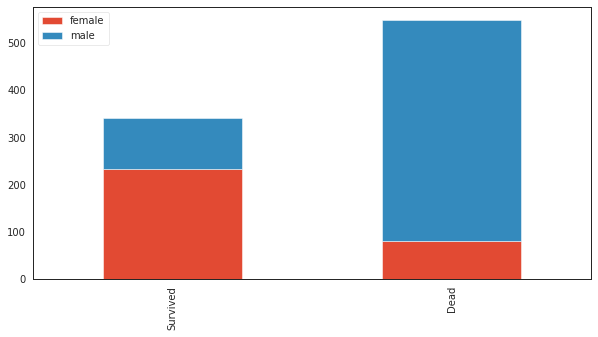

In [846]:
bar_chart('Sex')

Wykres potwierdza, że płeć miała bardzo duży wpływ na wynik.

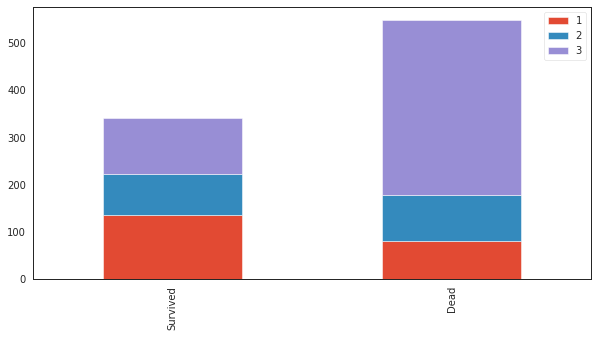

In [847]:
bar_chart('Pclass')

Wykres potwierdza, klasa miała wpływ na wynik.

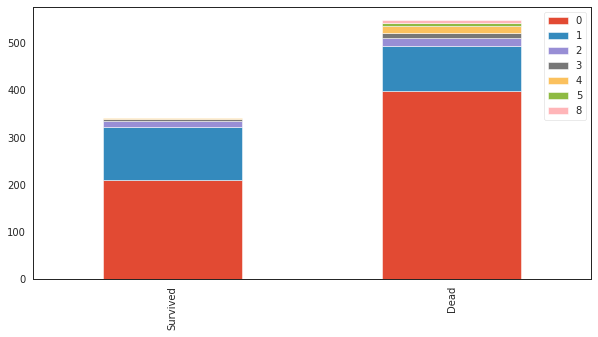

In [848]:
bar_chart('SibSp')

Wykres potwierdza, że osoba mająca z więcej niż 3 rodzeństwa (w tym może być małżonkek) przeżyła.

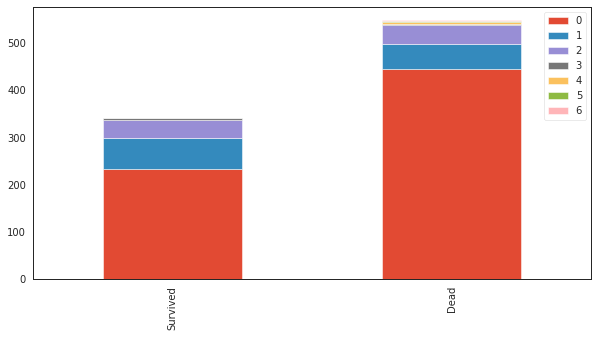

In [849]:
bar_chart('Parch')

Wykres potwierdza, że osoba mająca więcej niż 2 członków rodziny (rodzice i dzieci), prawdopodobnie przeżyła.

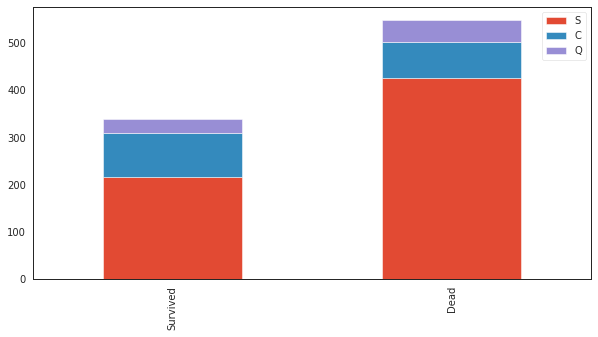

In [850]:
bar_chart('Embarked')

Wykres potwierdza, że osoba ropoczynająca podróż w Cherbourg miała większe szanse na przeżycie.

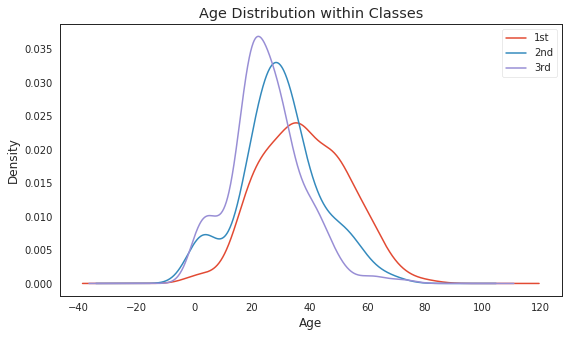

In [851]:
for x in [1, 2, 3]:
    train.Age[train.Pclass == x].plot(kind='kde')
plt.xlabel("Age")
plt.title('Age Distribution within Classes')
plt.legend(('1st', '2nd', '3rd'))

Wykres przedstawia podział wiekowy ze względu na klasę podróżujących.

Text(0.5, 1.0, 'High class Female Survival')

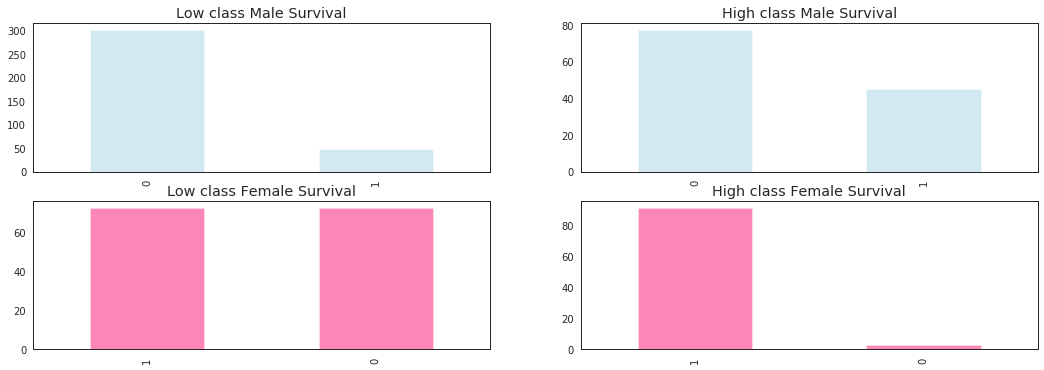

In [852]:
fig = plt.figure(figsize=(18,6))
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55
female_color = "#FA2379"

fig.add_subplot(2,2,1)
train.Survived[(train.Sex == "male") & (train.Pclass == 3)].value_counts().plot(kind='bar', color="lightblue", alpha=alpha_bar_chart)
plt.title("Low class Male Survival")

fig.add_subplot(2,2,2)
train.Survived[(train.Sex == "male") & (train.Pclass == 1)].value_counts().plot(kind='bar', color="lightblue", alpha=alpha_bar_chart)
plt.title("High class Male Survival")

fig.add_subplot(2,2,3)
train.Survived[(train.Sex == "female") & (train.Pclass == 3)].value_counts().plot(kind='bar', color=female_color, alpha=alpha_bar_chart)
plt.title("Low class Female Survival")

fig.add_subplot(2,2,4)
train.Survived[(train.Sex == "female") & (train.Pclass == 1)].value_counts().plot(kind='bar', color=female_color, alpha=alpha_bar_chart)
plt.title("High class Female Survival")

Jak widać na wykresach największy wpływ na przeżycie miała płeć. Istotna były również klasa w której podróżowano. Jak można zaobserwować przeżyło niemal 100% kobiet mających bilet pierwszej klasy i zginęło ponad 80% mężczyzn mający bilet trzeciej klasy.

# Przygotowanie danych

### Name

In [853]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    # dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [854]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Jonkheer      1
Lady          1
Sir           1
Don           1
Capt          1
Mme           1
Countess      1
Ms            1
Name: Title, dtype: int64

In [855]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [856]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

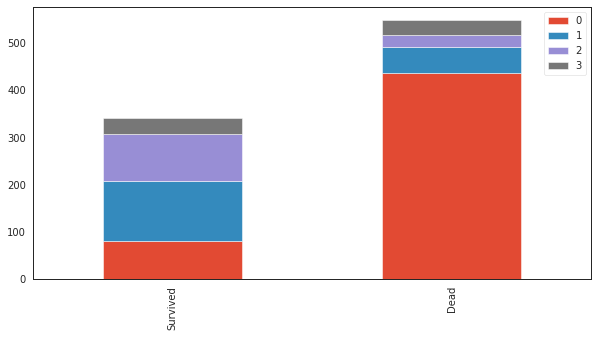

In [857]:
bar_chart('Title')

In [858]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [859]:
train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2


### Sex

In [860]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

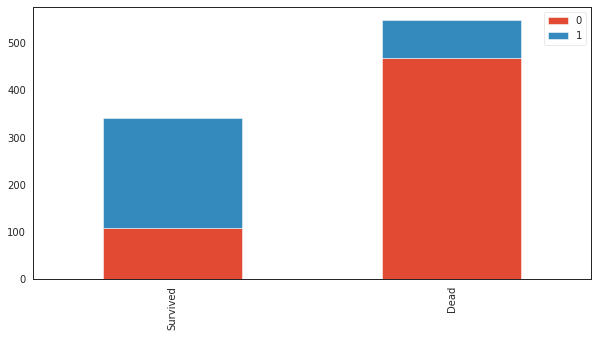

In [861]:
bar_chart('Sex')

### Age

In [862]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [863]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [864]:
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

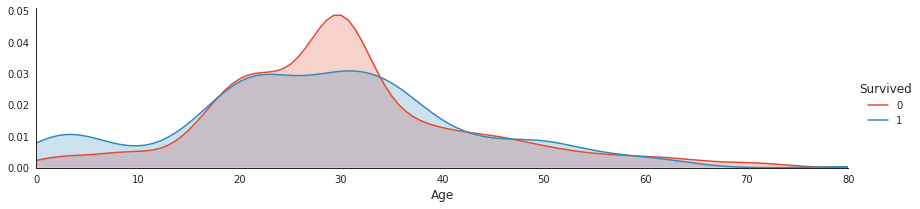

In [865]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

(0, 20)

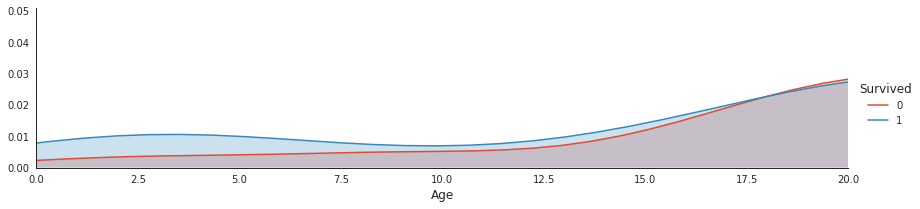

In [866]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

In [867]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [868]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


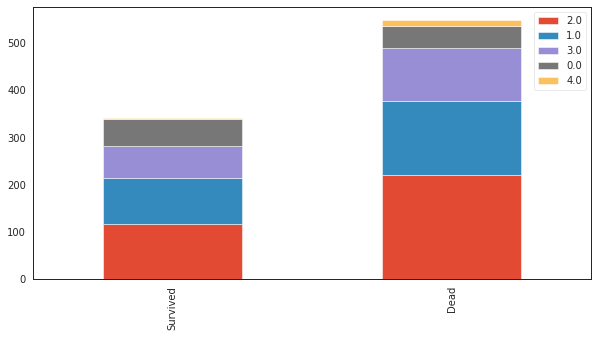

In [869]:
bar_chart('Age')

### Embarked

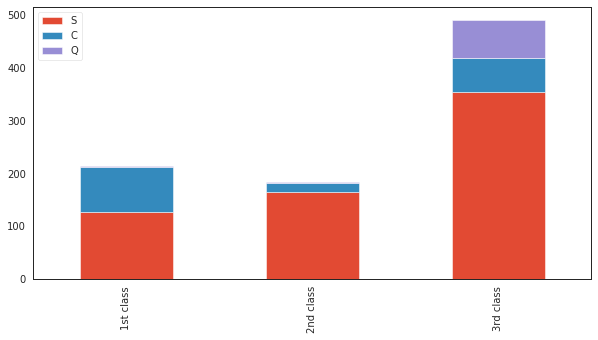

In [870]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [871]:
for dataset in train_test_data:
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

In [872]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [873]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


### Fare

In [874]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

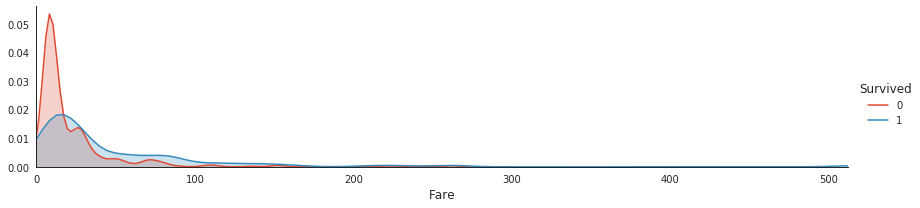

In [875]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

(0, 30)

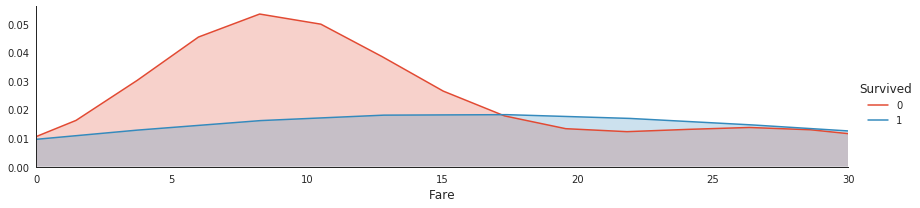

In [876]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

(30, 100)

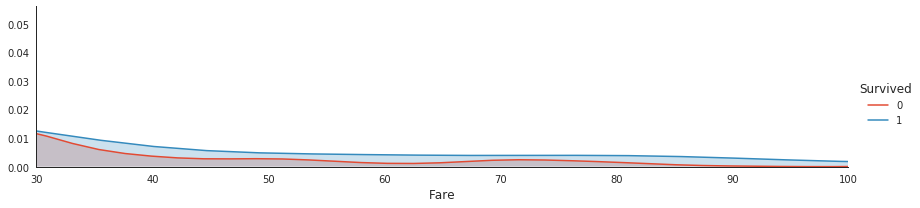

In [877]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(30, 100)

In [878]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [879]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


### Cabin

In [880]:
train[train.Cabin.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,NaN,2,0
7,8,0,3,0,0.0,3,1,349909,1.0,NaN,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,0,1.0,0,0,SOTON/OQ 392076,0.0,NaN,0,0
885,886,0,3,1,3.0,0,5,382652,1.0,NaN,2,2
886,887,0,2,0,2.0,0,0,211536,0.0,NaN,0,3
888,889,0,3,1,1.0,1,2,W./C. 6607,1.0,NaN,0,1


In [881]:
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F2             3
F33            3
              ..
D15            1
A6             1
E77            1
C118           1
C87            1
Name: Cabin, Length: 147, dtype: int64

In [882]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [883]:
train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

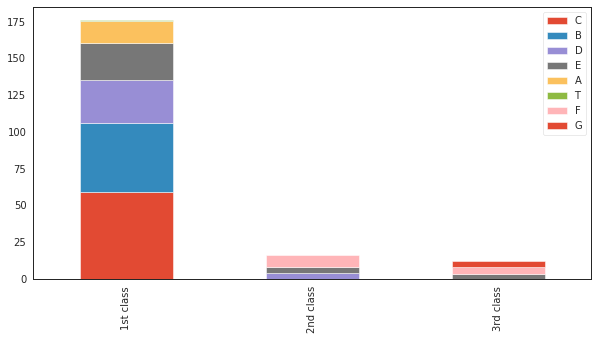

In [884]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [885]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [886]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

### FamilySize

In [887]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

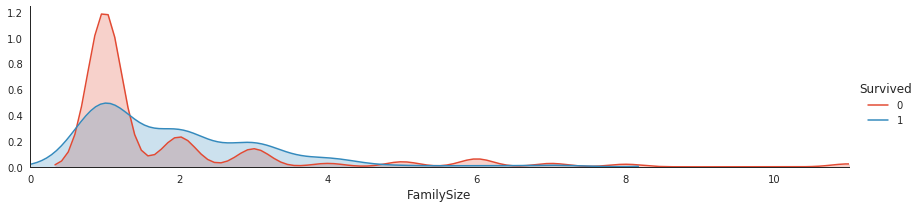

In [888]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [889]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [890]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [891]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [892]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [893]:
train_data.head(3)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0


# Modelowanie

In [894]:
from sklearn.neighbors import KNeighborsClassifier #
from sklearn.linear_model import LogisticRegression #
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier #
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [895]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import cross_val_score #

In [896]:
feature_names = ["Pclass", "Sex", "Age", "Fare", "Cabin", "Embarked", "Title", "FamilySize"]
features = train[feature_names].values
test_features = test[["Pclass", "Sex", "Age", "Fare", "Cabin", "Embarked", "Title", "FamilySize"]].values

## DecisionTreeClassifier

### Variant No. 1

In [742]:
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree = decision_tree.fit(features, target)
decision_tree.score(features, target)

0.9001122334455668

In [743]:
decision_tree.feature_importances_

array([0.0444452 , 0.03089258, 0.08829836, 0.07394596, 0.11823709,
       0.03011041, 0.44003363, 0.17403679])

In [744]:
scores = cross_val_score(decision_tree, features, target, scoring='accuracy', cv=30) 
scores

array([0.74193548, 0.77419355, 0.83870968, 0.70967742, 0.80645161,
       0.67741935, 0.67741935, 0.77419355, 0.70967742, 0.83333333,
       0.83333333, 0.93333333, 0.82758621, 0.72413793, 0.86206897,
       0.86206897, 0.79310345, 0.93103448, 0.72413793, 0.82758621,
       0.75862069, 0.79310345, 0.75862069, 0.86206897, 0.86206897,
       0.79310345, 0.82758621, 0.75862069, 0.82758621, 0.93103448])

In [745]:
round(scores.mean() * 100, 2)

80.11

### Variant No.2

In [703]:
decision_tree_two = DecisionTreeClassifier(
    max_depth = 7,
    min_samples_split = 2,
    random_state = 1)
decision_tree_two = decision_tree_two.fit(features, target)
decision_tree_two.score(features, target)

0.8742985409652076

In [704]:
scores = cross_val_score(decision_tree_two, features, target, scoring='accuracy', cv=30) 
scores

array([0.77419355, 0.77419355, 0.87096774, 0.77419355, 0.83870968,
       0.70967742, 0.70967742, 0.83870968, 0.80645161, 0.86666667,
       0.83333333, 0.9       , 0.89655172, 0.72413793, 0.82758621,
       0.86206897, 0.75862069, 0.96551724, 0.75862069, 0.86206897,
       0.79310345, 0.72413793, 0.75862069, 0.89655172, 0.86206897,
       0.79310345, 0.86206897, 0.82758621, 0.86206897, 0.96551724])

In [705]:
round(scores.mean() * 100, 2)

82.32

In [706]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree_two, feature_names=feature_names, out_file="data/decision_tree_two.dot")
# dot -Tpng decision_tree_two.dot > decision_tree_two.png

## KNeighborsClassifier

In [707]:
k_neighbors_classifier = KNeighborsClassifier(n_neighbors=13)
k_neighbors_classifier = k_neighbors_classifier.fit(features, target)
k_neighbors_classifier.score(features, target)

0.8451178451178452

In [708]:
scores = cross_val_score(k_neighbors_classifier, features, target, scoring='accuracy', cv=30, n_jobs=1) 
scores

array([0.74193548, 0.80645161, 0.83870968, 0.80645161, 0.93548387,
       0.77419355, 0.74193548, 0.83870968, 0.74193548, 0.9       ,
       0.86666667, 0.93333333, 0.82758621, 0.72413793, 0.86206897,
       0.79310345, 0.72413793, 0.96551724, 0.75862069, 0.86206897,
       0.86206897, 0.72413793, 0.86206897, 0.82758621, 0.86206897,
       0.79310345, 0.93103448, 0.82758621, 0.79310345, 0.93103448])

In [709]:
round(np.mean(scores)*100, 2)

82.86

## LogisticRegression

In [710]:
logistic_regression = LogisticRegression()
logistic_regression = logistic_regression.fit(features, target)
logistic_regression.score(features, target)

0.8215488215488216

In [711]:
scores = cross_val_score(logistic_regression, features, target, scoring='accuracy', cv=30) 
scores

array([0.80645161, 0.77419355, 0.83870968, 0.74193548, 0.83870968,
       0.83870968, 0.77419355, 0.83870968, 0.70967742, 0.9       ,
       0.9       , 0.86666667, 0.82758621, 0.72413793, 0.89655172,
       0.86206897, 0.62068966, 0.89655172, 0.75862069, 0.82758621,
       0.82758621, 0.75862069, 0.86206897, 0.75862069, 0.86206897,
       0.75862069, 0.86206897, 0.79310345, 0.79310345, 0.86206897])

In [712]:
round(np.mean(scores)*100, 2)

81.27

## PolynomialFeatures

In [713]:
polynomial_features = PolynomialFeatures(degree=2)
polynomial_features = polynomial_features.fit_transform(features)

In [714]:
logistic_regression = LogisticRegression(C=10)
logistic_regression.fit(polynomial_features, target)
logistic_regression.score(polynomial_features, target)

0.8518518518518519

In [715]:
scores = cross_val_score(logistic_regression, features, target, scoring='accuracy', cv=30) 
scores

array([0.80645161, 0.80645161, 0.83870968, 0.74193548, 0.83870968,
       0.90322581, 0.77419355, 0.83870968, 0.70967742, 0.9       ,
       0.9       , 0.86666667, 0.82758621, 0.72413793, 0.89655172,
       0.86206897, 0.62068966, 0.89655172, 0.75862069, 0.82758621,
       0.82758621, 0.75862069, 0.86206897, 0.79310345, 0.86206897,
       0.75862069, 0.86206897, 0.79310345, 0.79310345, 0.89655172])

In [716]:
round(np.mean(scores)*100, 2)

81.82

## Random Forest

In [903]:
forest = RandomForestClassifier(
    max_depth = 7,
    min_samples_split = 4,
    n_estimators = 1000,
    random_state = 1,
    n_jobs = -1
)
forest = forest.fit(features, target)

In [904]:
forest.feature_importances_

array([0.09602699, 0.24947624, 0.06906333, 0.076168  , 0.11072195,
       0.03634923, 0.26260841, 0.09958585])

In [905]:
forest.score(features, target)

0.8653198653198653

In [906]:
scores = cross_val_score(forest, features, target, scoring='accuracy', cv=10)

In [907]:
scores

array([0.81111111, 0.83333333, 0.73033708, 0.87640449, 0.85393258,
       0.82022472, 0.83146067, 0.7752809 , 0.85393258, 0.86363636])

In [908]:
round(np.mean(scores)*100, 2)

82.5

## Naive Bayes

In [775]:
gaussian_nb = GaussianNB()
gaussian_nb = gaussian_nb.fit(features, target)

In [776]:
gaussian_nb.score(features, target)

0.7890011223344556

In [777]:
scores = cross_val_score(gaussian_nb, features, target, scoring='accuracy', cv=30, n_jobs=1) 
scores

array([0.74193548, 0.70967742, 0.87096774, 0.67741935, 0.77419355,
       0.77419355, 0.77419355, 0.83870968, 0.67741935, 0.73333333,
       0.76666667, 0.86666667, 0.82758621, 0.72413793, 0.86206897,
       0.79310345, 0.65517241, 0.82758621, 0.72413793, 0.75862069,
       0.93103448, 0.82758621, 0.86206897, 0.75862069, 0.79310345,
       0.79310345, 0.82758621, 0.75862069, 0.82758621, 0.79310345])

In [772]:
round(np.mean(scores)*100, 2)

78.5

## SVC

In [773]:
svc = SVC()
svc = svc.fit(features, target)
svc.score(features, target)

0.8395061728395061

In [774]:
svc.score(features, target)

0.8395061728395061

In [778]:
scores = cross_val_score(svc, features, target, scoring='accuracy', cv=30, n_jobs=1) 
scores

array([0.87096774, 0.77419355, 0.87096774, 0.74193548, 0.90322581,
       0.90322581, 0.77419355, 0.83870968, 0.70967742, 0.86666667,
       0.9       , 0.93333333, 0.82758621, 0.72413793, 0.89655172,
       0.82758621, 0.68965517, 0.96551724, 0.79310345, 0.82758621,
       0.86206897, 0.75862069, 0.82758621, 0.79310345, 0.82758621,
       0.79310345, 0.96551724, 0.82758621, 0.79310345, 0.93103448])

In [779]:
round(np.mean(scores)*100, 2)

83.39

## GradientBoostingClassifier

In [723]:
grid_search = GridSearchCV(
    estimator = GradientBoostingClassifier(
        learning_rate=0.001,
        min_samples_split=40,
        min_samples_leaf=1,
        max_features=2,
        max_depth=12,
        n_estimators=70,
        subsample=0.75,
        random_state=10), 
    param_grid = {'n_estimators':[140, 280, 560, 1120, 4480],
                  'learning_rate': [0.003, 0.005, 0.007]
                 },
    scoring='roc_auc',
    n_jobs=4,
    iid=False,
    cv=10)

grid_search.fit(features, target)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None,
                                                  learning_rate=0.001,
                                                  loss='deviance', max_depth=12,
                                                  max_features=2,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=40,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=70,
                                                  n_iter_no_change=None,
       

In [724]:
grid_search.best_params_, grid_search.best_score_

({'learning_rate': 0.003, 'n_estimators': 560}, 0.8762508700449876)

In [725]:
gbm = GradientBoostingClassifier(
    learning_rate = 0.005,
    min_samples_split=40,
    min_samples_leaf=1,
    max_features=2,
    max_depth=12,
    n_estimators=1500,
    subsample=0.85,
    random_state=1)
gbm = gbm.fit(features, target)

In [726]:
gbm.feature_importances_

array([0.09679242, 0.21444487, 0.08780599, 0.08579733, 0.11619775,
       0.04463133, 0.24679418, 0.10753613])

In [727]:
gbm.score(features, target)

0.8922558922558923

In [728]:
scores = cross_val_score(gbm, features, target, scoring='accuracy', cv=20)

In [729]:
scores

array([0.73913043, 0.91304348, 0.8       , 0.8       , 0.71111111,
       0.75555556, 0.8       , 0.93333333, 0.93333333, 0.84090909,
       0.84090909, 0.84090909, 0.77272727, 0.86363636, 0.79545455,
       0.81818182, 0.84090909, 0.86363636, 0.84090909, 0.88636364])

In [730]:
round(np.mean(scores)*100, 2)

82.95

## Testing

In [784]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [785]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [786]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
